<center>
# TP 3 - Méthodes de Monte-Carlo

On s'intéresse ici à l'estimation d'une espérance mathématique à partir de la méthode de Monte-Carlo, méthode numérique probabiliste permettant d'intégrer une fonction par rapport à une mesure de probabilité. 

In [3]:
%matplotlib inline
from math import *
import numpy as  np   
import scipy as sp
import scipy.special as spc
from pylab import *

## Exercice 1

On souhaite estimer l'intégrale $$I = \int_{0}^2 x^2 dx \quad (=\frac{8}{3})$$

>**Question 1.** Soit $X$ et $Y$ des variables aléatoires ayant pour densités respectives
$$f_X(x) = \frac{1}{2} \mathbb{1}_{[0,2]}(x) \quad \text{et} \quad f_Y(y) = \frac{1}{2} y \mathbb{1}_{[0,2]}(y).$$
Vérifier que 
$$I = \mathbb{E}(g(X)) = \mathbb{E}(h(Y))$$
où $g$ et $h$ sont deux fonctions à déterminer, puis vérifier que   
$$Var(g(X)) = \frac{256}{45} = 5.69 \quad \text{et} \quad  
Var(h(Y)) = \frac{8}{9} = 0.89$$
On note par la suite $\hat I_n^1$ et $\hat I_n^2$ les estimateurs de Monte-Carlo respectivement définis par 
$$
\hat I_n^1 = \frac{1}{n}\sum_{i=1}^n g(X_i)\quad \text{et} \quad \hat I_n^2 = \frac{1}{n}\sum_{i=1}^n h(Y_i)
$$

Définir les fonctions <code>g</code> et <code>h</code>.

In [46]:
I= 8./3.

def g(x):
    return 2. * x**2
def h(y):
    return 2.* y

>**Question 2.** Créer une fonction <code>MCtraj1</code> (resp. <code>MCtraj2</code>) qui prend en argument $n$ et 
qui renvoie un vecteur de taille $n$ contenant les valeurs de
$ \hat I_k^1$ (resp. $\hat I_k^2$) pour $k=1,\dots,n $, obtenues à partir d'un unique échantillon de taille $n$ de $X$ (resp. $Y$).
Représentez sur un même graphique les trajectoires de $ \hat I_k^1$ et $\hat I_k^2$.

0.0044294210890290925

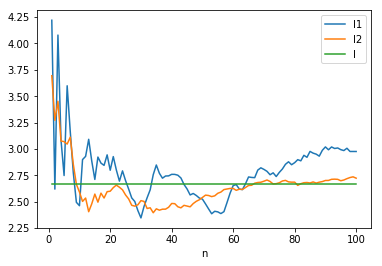

In [64]:
def MCtraj1(n):
    X = 2 * np.random.uniform(0, 1, n)
    gX = g(X)
    return gX.cumsum() / arange(1, n+1)
    
def MCtraj2(n):
    Y = 2 * np.sqrt(np.random.uniform(0, 1, n))
    hY = h(Y)
    return hY.cumsum() / arange(1, n+1)

N = 100
n = arange(1,N+1)
plot(n, MCtraj1(N), label = 'I1')
plot(n, MCtraj2(N), label = 'I2')
plot(n, np.ones(N)*I, label = 'I')
xlabel('n')
legend()


>**Question 3.** Pour comparer les performances des deux méthodes proposées, on fixe $n$ et on relance $N_{s}$ fois l’estimation de $I$ pour déterminer quelle méthode est la plus précise.  

>**(a)** Créer deux nouvelles fonctions qui effectuent $N_{s}$ simulations de $\hat I^1_n$ et $\hat I^2_n$ respectivement.  
Comparer les boxplots des deux vecteurs obtenus pour $n=100$ et $N_s=1000$.  
Vérifier que l'estimateur $\hat I_n^1$ fournit effectivement une estimation plus précise et justifier pourquoi.  

>**(b)** Pour chaque méthode, relever la proportion d'estimations, parmi les $N_s$ estimations,  
qui sont dans l'intervalle $[I(1-\epsilon),I(1+\epsilon)]$. La meilleure méthode est celle dont la proportion est la plus élevée. Appliquer avec $n=100$, $N_s=1000$ et $\epsilon=0.05$.

In [69]:
def MCtraj1N(n, Ns):
    X = np.random.uniform(0, 2, (n, Ns))
    gX = g(X)
    return gX.sum(axis = 0) / n

def MCtraj2N(n, Ns):
    Y = 2* np.sqrt(np.random.uniform(0, 1, (n, Ns)))
    hY = h(Y)
    return hY.sum(axis = 0) / n

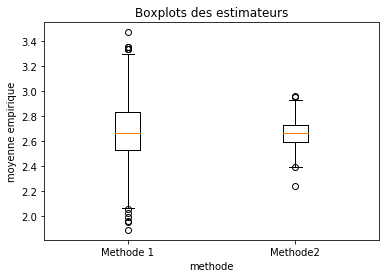

In [78]:
n = 100
Ns = 1000

MC = np.array([MCtraj1N(n, Ns), MCtraj2N(n, Ns)])
boxplot(transpose(MC), labels = ["Methode 1", "Methode2"])
xlabel("methode")
ylabel("moyenne empirique")
title("Boxplots des estimateurs")

In [79]:
epsilon = .05
p = [(MC[i] > (I*(1 - epsilon))) & (MC[i] > (I*(1 + epsilon))) for i in [0,1]]
p = [np.sum(p[i])/Ns for i in [0,1]]
print(p)

[0.27900000000000003, 0.083000000000000004]


## Exercice 2

On souhaite estimer 
$$
I = \mathbb{E}(\mathbb{1}_{X \in (0,1)})
$$
où  $X$ est une variable aléatoire gaussienne standard.
On note par la suite $\hat I_n^1$ l'estimateur de Monte-Carlo de $I$  
$$
\hat I_n = \frac{1}{n}\sum_{i=1}^n \mathbb{1}_{X_i \in (0,1)}
$$
où les $X_i$ sont des réalisations indépendantes de $X$.  

On souhaite mettre en oeuvre une méthode de Monte-Carlo avec tirage d'importance.   $X$ admet comme densité $f_X(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$  et on note que  $e^{-x^2/2}$ admet 
comme développement de Taylor du second ordre en $0$ la fonction $(1+\frac{x^2}{2})^{-1}$. On définit alors $Y$ la variable aléatoire qui admet comme densité 
$$f_Y(y) \sim (1+\frac{y^2}{2})^{-1} \mathbb{1}_{y \in (0,1)}$$ dont le support $(0,1)$. 
On considère alors l'estimateur de Monte-Carlo de $I$ avec tirage d'importance
$$
\hat I_n^{IS} = \frac{1}{n}\sum_{i=1}^n \frac{f_X(Y_i)}{f_Y(Y_i)}
$$
où les $Y_i$ sont des réalisations indépendantes de $Y$.

>**Question 1.** Créer une fonction <code>MCtraj</code> qui prend comme argument $n$, réalise $n$ tirages de $X$ et renvoie le vecteur des estimations $\hat I_k$ pour $k=1,\dots,n$. Représenter une trajectoire pour $n = 100$.

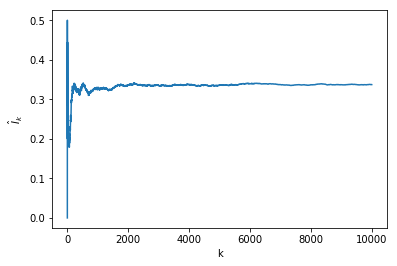

In [98]:
def MCtraj(n):
    X = randn(n)
    gX = (X < 1) & (X > 0)
    return gX.cumsum() / arange(1, n+1)

n = 10000
I1 = MCtraj(n)
plot(I1)
xlabel('k')
ylabel('$\hat I_k$');

>**Question 2.** Vérifier que l'inverse de la fonction de répartition de probabilité de $Y$ est $F_Y^{-1}(u) = \sqrt{2} \tan(u \arctan(1/\sqrt{2}))$.
Créer une fonction <code>MCtraj_IS</code> qui prend pour argument $n$, réalise $n$ tirages de $Y$ et renvoie le vecteur des estimations $I^{IS}_k$ pour $k=1,\dots,n$. Représenter sur la même figure une trajectoire de $\hat I_k$ et $\hat I^{IS}_k$ pour $n = 100$. Quelle approche vous semble la plus efficace  pour estimer $I$  ?

In [99]:
def MCtraj_IS(n):
    U = rand(n)
    Y = sqrt(2) * tan(U * atan(1/sqrt(2)))
    fY = 1/(1+(Y**2)/2)/sqrt(2)/atan(1/sqrt(2))
    fX = 1/sqrt(2*np.pi)*np.exp(-(Y**2)/2)
    I = fX/fY
    I = I.cumsum() / arange(1, n+1)
    return I

n =100 

I1 = MCtraj(n)
I2 = MCtraj_IS(n)

>**Question 3.** 
Créer une fonction <code>MC</code> (resp. <code>MC_IS</code>) qui prend comme arguments $n$ et $N_s$ et qui renvoie un vecteur contenant $N_s$ tirages de l'estimateur $\hat I_n$ (resp. $\hat I_n^{IS}$). 
Calculer la variance empirique des estimateurs $\hat I_n$ et  $\hat I_n^{IS}$ pour $n=10$ en prenant $N_s=1000$.